##### 10. We now use boosting to predict Salary in the Hitters data set.

In [1]:
import numpy as np
import pandas as pd
from ISLP import load_data

In [2]:
df = load_data('Hitters')
df

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


##### (a) Remove the observations for whom the salary information is unknown, and then log-transform the salaries.

In [3]:
df = df.dropna()
df['Salary'] = np.log(df['Salary'])
df

/tmp/ipykernel_14843/2016854763.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Salary'] = np.log(df['Salary'])


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,6.163315,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,6.173786,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,6.214608,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,4.516339,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,6.620073,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,6.551080,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,6.774224,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,5.953243,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,6.866933,A


In [4]:
df = pd.get_dummies(df, dtype=int)
df

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,PutOuts,Assists,Errors,Salary,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,315,81,7,24,38,39,14,3449,835,69,...,632,43,10,6.163315,0,1,0,1,0,1
2,479,130,18,66,72,76,3,1624,457,63,...,880,82,14,6.173786,1,0,0,1,1,0
3,496,141,20,65,78,37,11,5628,1575,225,...,200,11,3,6.214608,0,1,1,0,0,1
4,321,87,10,39,42,30,2,396,101,12,...,805,40,4,4.516339,0,1,1,0,0,1
5,594,169,4,74,51,35,11,4408,1133,19,...,282,421,25,6.620073,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,...,325,9,3,6.551080,0,1,1,0,0,1
318,492,136,5,76,50,94,12,5511,1511,39,...,313,381,20,6.774224,1,0,1,0,1,0
319,475,126,3,61,43,52,6,1700,433,7,...,37,113,7,5.953243,1,0,0,1,1,0
320,573,144,9,85,60,78,8,3198,857,97,...,1314,131,12,6.866933,1,0,1,0,1,0


##### (b) Create a training set consisting of the frst 200 observations, and a test set consisting of the remaining observations.

In [5]:
from sklearn.model_selection import train_test_split
x = df.drop('Salary', axis=1)
y = df['Salary']
x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle=False, train_size=200)

##### (c) Perform boosting on the training set with 1,000 trees for a range of values of the shrinkage parameter λ. Produce a plot with diferent shrinkage values on the x-axis and the corresponding training set MSE on the y-axis.

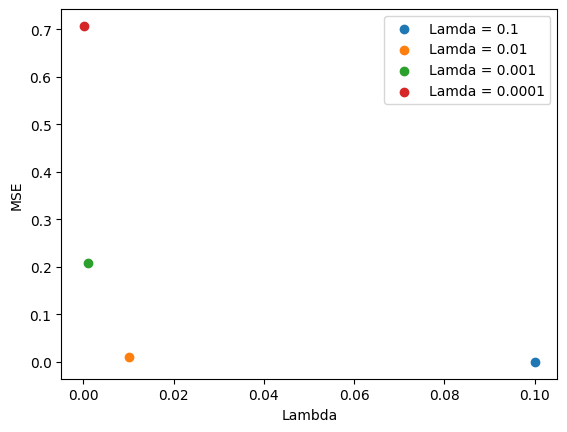

In [6]:
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_squared_error as MSE
for i in [0.1, 0.01, 0.001, 0.0001]:
    model = GradientBoostingRegressor(n_estimators=1000, learning_rate=i).fit(x_train, y_train)
    plt.scatter(i, MSE(y_train, model.predict(x_train)), label=f'Lamda = {i}')
plt.xlabel('Lambda')
plt.ylabel('MSE')
plt.legend()

##### (d) Produce a plot with diferent shrinkage values on the x-axis and the corresponding test set MSE on the y-axis.

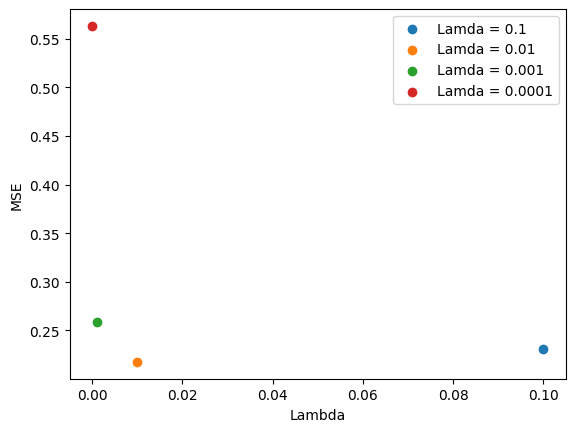

In [7]:
for i in [0.1, 0.01, 0.001, 0.0001]:
    model = GradientBoostingRegressor(n_estimators=1000, learning_rate=i).fit(x_train, y_train)
    plt.scatter(i, MSE(y_test, model.predict(x_test)), label=f'Lamda = {i}')
plt.xlabel('Lambda')
plt.ylabel('MSE')
plt.legend()

##### (e) Compare the test MSE of boosting to the test MSE that results from applying two of the regression approaches seen in Chapters 3 and 6.

In [8]:
from sklearn.linear_model import LassoCV, LinearRegression
linreg = LinearRegression().fit(x_train, y_train)
lasso = LassoCV(cv=5).fit(x_train, y_train)
boost = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.01).fit(x_train, y_train)

def printmse(model, modelname):
    print(f'{modelname}:', MSE(y_test, model.predict(x_test)))
printmse(linreg, 'Linear Regression')
printmse(lasso, 'Lasso')
printmse(boost, 'Boosting')


Linear Regression: 0.49179593754549145
Lasso: 0.4865863696030245
Boosting: 0.21716717043623726


##### (f) Which variables appear to be the most important predictors in the boosted model?

In [9]:
feature_importance = pd.DataFrame({'Importance' : boost.feature_importances_},
                                  index=x_train.columns).sort_values(by='Importance',ascending=False)
feature_importance

,Importance
CAtBat,0.533502
CHits,0.096180
CRuns,0.049667
AtBat,0.049201
Walks,0.048447
CRBI,0.038132
CHmRun,0.035076
CWalks,0.033169
Years,0.028426
Hits,0.024805


##### (g) Now apply bagging to the training set. What is the test set MSE for this approach?

In [10]:
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
bagging = BaggingRegressor(n_estimators=1000, random_state=1).fit(x_train, y_train)
bagging2 = RandomForestRegressor(n_estimators=1000, max_features=x_train.shape[1],
                                 random_state=1).fit(x_train, y_train)
printmse(bagging, 'Bagging Regressor')
printmse(bagging2, 'Random Forest Bagging')

Bagging Regressor: 0.22907993815187197
Random Forest Bagging: 0.22930168967516984
